### 3.3 Programming Task: Housing Price Regression Problem
The file __house\_prices.txt__ contains a data set of house prices: the
first column is the house size in square feet, the second column is the number
of bedrooms, the third column is the price in USD.


i\. Plot house prices vs. house sizes as a scatter plot.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


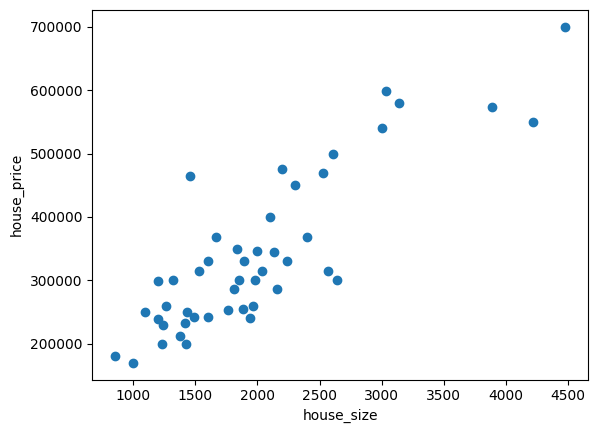

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# TODO: Read and prepare scatter plot
f = open('\\house_prices.txt',"r")
house_price = []
house_size = []

house_price_np = np.array([])
house_size_np = np.array([])

contents = f.readlines()
for x in contents:
    house_size.append(x.split(',')[0])
    house_price.append(x.split(',')[2].strip())
    
house_size_np = np.array(house_size,'float')
house_price_np = np.array(house_price,'float')

f.close()


plt.xlabel('house_size')
plt.ylabel('house_price')
plt.scatter(house_size_np, house_price_np)



ii\. Next, fit the linear regression to these data points. You should not use
    any other python module besides NumPy to find the weights of the model.

* Consider the linear model $h_{\boldsymbol{w}}(\boldsymbol{x})=w_0 x_0 + w_1 x_1={\boldsymbol{w}}^\top\boldsymbol{x}$,
    where $x_1$ is the house size in the first column of __house\_prices.txt__, $x_0=1$ by convention, $\boldsymbol{x}={[x_0,x_1]}^\top$, 
    and $\boldsymbol{w}={[w_0, w_1]}^\top$. Define the cost function on the dataset:
 
    $J(\boldsymbol{w})=\frac{1}{2}\sum_{i=1}^{n} \left(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})-y^{(i)}\right)^2.$

 
    Above, $n$ is the number of rows in __house_prices.txt__, $y^{(i)}$
    is the house price given in the third column of the file, $\boldsymbol{x}^{(i)} = {[1\
    x_1^{(i)}]}$ and $x_1^{(i)}$ is the house size from the first column and
    $i$th row of the file. $h_{\boldsymbol{w}}(\cdot)$ represents the linear regression model. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour
    plot. You may rescale the data if required. 

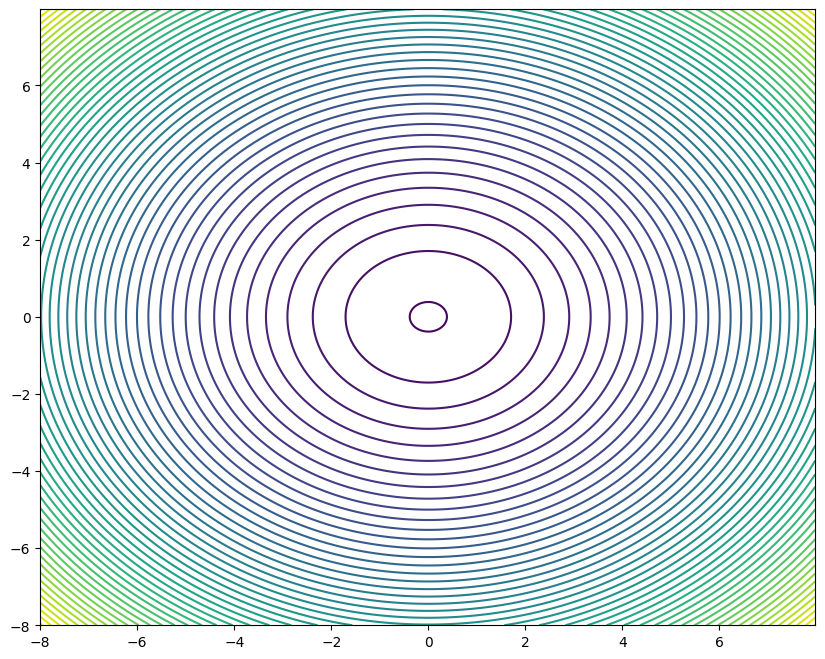

In [11]:
# TODO: Define function J(w)
def J_w(x,y,w):
    a = np.sum((np.square((w@x))-y))
    cost = (1/(2) * (a))
    return cost




# TODO: Define function gradient_J(w)
def gradient_J(w,x,y):
    w0 = w[0]
    w1 = w[1]
    arg1 = 0.0
    arg2 = 0.0
    m = len(x)
    
    for i in range(len(x)):
        arg1 += (w0 + (w1 * x[i]) - y[i])
        arg2 += (((w0 + (w1 * x[i]) - y[i])) *x[i])
    
    
    partial_derivative_w0 =  arg1 / m
    partial_derivative_w1 =  arg2 / m    
    grad_J_w = np.array([partial_derivative_w0,partial_derivative_w1])
    
    return grad_J_w



# TODO: Plot the cost function

house_size_mt = np.matrix(house_size_np)
house_price_mt = np.matrix(house_price_np)


w = np.zeros([2,1])
delta = 0.025
max_value = 8
w0 = np.arange(-max_value, max_value, delta)
w1 = np.arange(-max_value, max_value, delta)
weights = np.zeros([2,1])
X,Y = np.meshgrid(w0,w1)
J = []
for i in range(len(X)):
    for j in range(len(X)):
        weights[0] = X[i][j]
        weights[1] = Y[i][j]
        cost = J_w(house_size_mt,house_price_mt,weights)
        J.append(cost)
        #print(J)


J = np.array(J)
J = J.reshape((len(X), len(Y)))
plt.figure(figsize=(10,8))
contour_plot = plt.contour(X,Y,J,50)



* Start with some initial value $\boldsymbol{w}$
and run the steps of the gradient descent algorithm (you may reuse revelant
parts of the solution from task 3.2). Plot the location of each new $\boldsymbol{w}$ on
the contour plot similar to the previous task.

[-0.32631875  0.02908672]


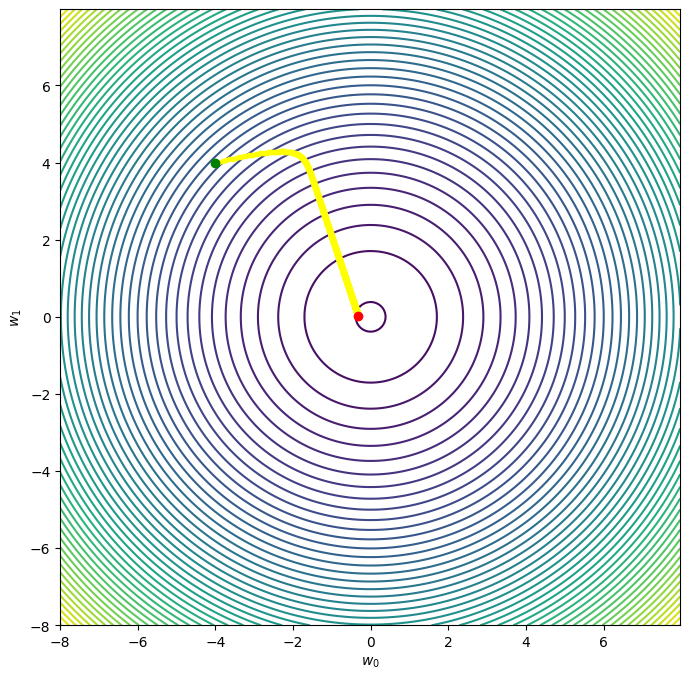

In [5]:

def gradientDescent(grad_J_w,initial,alpha,tol,maxIters,x,y):
    w = np.array(initial)
    w_history = [initial]
    
    
    for iter in range(maxIters):
        gradient = grad_J_w(w,x,y)
        w = w - alpha*gradient
        w_history.append(w)
        if np.linalg.norm(gradient) < tol:
            break
            
    w_history = np.array(w_history)
    return w, w_history, iter
# TODO: Train w 
# Store each update of w in an array to make plot later.
initial_w = [-4,4]
alpha = 0.04

#normalize x
x = []
min = np.min(house_size_np)
max = np.max(house_size_np)
for val in house_size_np:
    x.append((val - min) / (max - min))
    
#normalise y
y = []
min = np.min(house_price_np)
max = np.max(house_price_np)
for val in house_size_np:
    y.append((val - min) / (max - min))


w, w_history, iters = gradientDescent(gradient_J,initial_w,alpha,1e-3,10000,x,y)

print(w)



# TODO: Prepare contour plot and mark each weight update on the plot.

plt.figure(figsize=(8,8))
plt.contour(X,Y,J,50)
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

plt.plot(w_history[0,0],w_history[0,1],marker="o",zorder=4,color='green')

plt.plot(w_history[:,0],w_history[:,1], '.-', color='yellow')

plt.plot(w_history[-1,0],w_history[-1,1],marker="o",zorder=4,color='red')

plt.show()


# OPTIONAL: Plot the resulting linear regression function

* Experiment by making changes to the learning rate of the gradient descent
algorithm. Observe how the path of the algorithm changes. Make sure that the
algorithm converges to the true minimum of the function $J(\boldsymbol{w})$.

[-0.32616666  0.02862706]


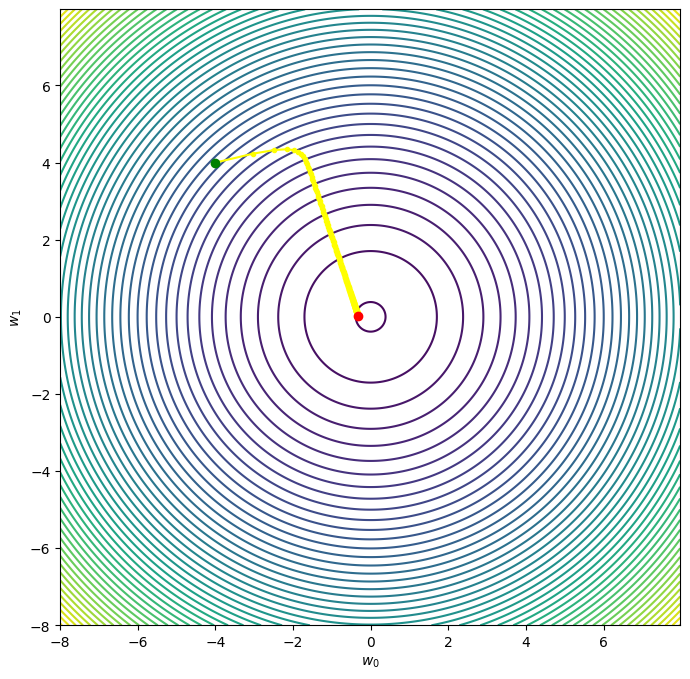

In [8]:
# TODO: Define alphas (learning rates) to test.
alpha = 0.4



# TODO: Repeat experiment for each alpha and observe the contour plot in each case. You may use subplots in Matplotlib for the plots.

w, w_history, iters = gradientDescent(gradient_J,initial_w,alpha,1e-3,10000,x,y)

print(w)

plt.figure(figsize=(8,8))
plt.contour(X,Y,J,50)
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

plt.plot(w_history[0,0],w_history[0,1],marker="o",zorder=4,color='green')

plt.plot(w_history[:,0],w_history[:,1], '.-', color='yellow')

plt.plot(w_history[-1,0],w_history[-1,1],marker="o",zorder=4,color='red')

plt.show()




iii\. Determine the weights of the model using the closed form solution for $\boldsymbol{w}$:
\begin{align}
    \hat{\mathbf{w}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty
\end{align}
Above, $\mathbf{y} = [y^{(1)},..., y^{(n)}]^T$ and $\mathbf{X}$ is the data matrix whose rows are $x^{(i)}$. Is this the same point that you have found above using gradient descent?

In [9]:
# TODO: Compute the closed form solution
x_matrix = np.matrix(x)
y_matrix = np.matrix(y)
def w():
    a = x_matrix @ x_matrix.T
    b = np.linalg.inv(a)
    c = x_matrix @ y_matrix.T
    return b @ c
weight_of_model = w()
print(weight_of_model)


[[-0.67880647]]
